In [34]:
#data import
import pandas as pd
import numpy as np
from scipy import interp
votes=pd.read_table('house-votes-84.txt',index_col=None)
# decribe the data
print(votes.keys())

Index(['Party', 'handicapped_infants', 'water_project_cost_sharing',
       'adoption_of_the_budget_resolution', 'physician_fee_freeze',
       'el_salvador_aid', 'religious_groups_in_schools',
       'nti_satellite_test_ban', 'aid_to_nicaraguan_contras', 'mx_missile',
       'immigration', 'synfuels_corporation_cutback', 'education_spending',
       'superfund_right_to_sue', 'crime', 'duty_free_exports',
       'export_administration_act_sa'],
      dtype='object')


In [35]:
#separate the features and target
target=pd.concat([votes[['Party']]])
features=votes.drop(['Party'], axis=1)

In [36]:
#transfer the label from string to int
label=target.values
k=0
label_new=[]
for i in label:
    for j in i:
        if j=='republican':
            label_new.append(1)
        else:
            label_new.append(0)
label=np.array(label_new)

In [37]:
#transfer the data from string to int
data=features.values
k=0
for i in data:
    n=0
    for j in i:
        if j=='y':
            data[k][n]=1
        elif j=='n':
            data[k][n]=0
        else:
            data[k][n]=2
        n+=1
    k+=1

The first accuracy is 0.885057471264
The number of wrong predictions by using first split is 10
The sensitivity of Republican in first split is 0.823529411765
The sensitivity of Democratic in first split is 0.924528301887
The precision of Republican in first split is 0.875
The precision of Democratic in first split is 0.890909090909


The second accuracy is 0.931034482759
The number of wrong predictions by using second split is 6
The sensitivity of Republican in second split is 0.888888888889
The sensitivity of Democratic in second split is 0.960784313725
The precision of Republican in second split is 0.941176470588
The precision of Democratic in second split is 0.924528301887


The third accuracy is 0.965517241379
The number of wrong predictions by using third split is 3
The sensitivity of Republican in third split is 0.972222222222
The sensitivity of Democratic in third split is 0.960784313725
The precision of Republican in third split is 0.945945945946
The precision of Democratic in

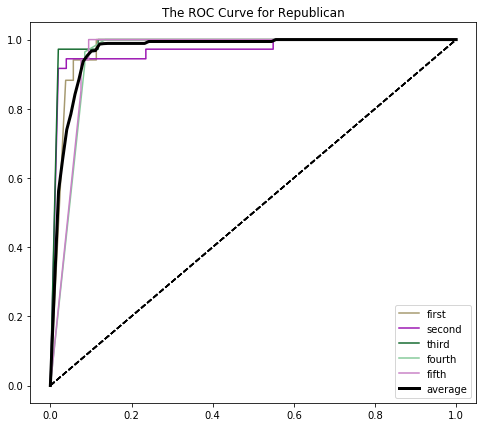

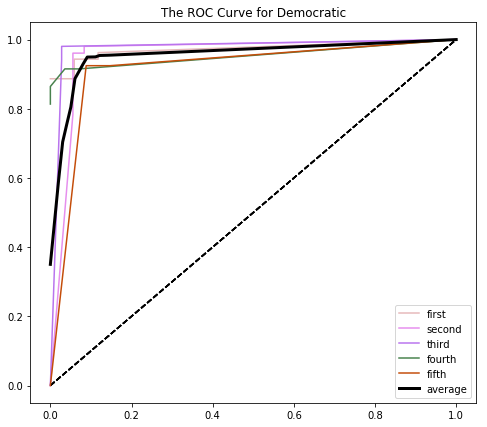

In [48]:
#use 5-fold-cross validation for GaussianNB classifier

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import RepeatedKFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn import metrics
import random

random_state = 5
rkf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
order=['first','second','third','fourth','fifth']
k=0
score=[]
Repub_recall=0
Demo_recall=0
Repub_precision=0
Demo_precision=0

tprs_1 = []
mean_fpr_1 = np.linspace(0, 1, 100)

tprs_0 = []
mean_fpr_0 = np.linspace(0, 1, 100)

for train, test in rkf.split(data):
    X_train, X_test = data[train], data[test]
    y_train, y_test = label[train], label[test]
    Mnb=GaussianNB()
    print("The",order[k],"accuracy is",Mnb.fit(X_train,y_train).score(X_test,y_test))
    table_p=Mnb.fit(X_train,y_train).predict(X_test)
    print("The number of wrong predictions by using",order[k],"split is",(y_test!=table_p).sum())
    print("The sensitivity of Republican in",order[k],"split is",recall_score(y_test,table_p))
    print("The sensitivity of Democratic in",order[k],"split is",recall_score(y_test,table_p,pos_label=0))
    print("The precision of Republican in",order[k],"split is",precision_score(y_test,table_p))
    print("The precision of Democratic in",order[k],"split is",precision_score(y_test,table_p,pos_label=0))
    fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,Mlp.fit(X_train,y_train).predict_proba(X_test)[:,1],pos_label=1)
    fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test,Mlp.fit(X_train,y_train).predict_proba(X_test)[:,0],pos_label=0)
    
    plt.figure(num=1,figsize=(8,7))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr1,tpr1,color=(random.random(),random.random(),random.random()),label=order[k])
    plt.title("The ROC Curve for Republican")
    
    plt.figure(num=0,figsize=(8,7))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr0,tpr0,color=(random.random(),random.random(),random.random()),label=order[k])
    plt.title("The ROC Curve for Democratic")
    
    score.append(Mnb.fit(X_train,y_train).score(X_test,y_test))
    Repub_recall=recall_score(y_test,table_p)+Repub_recall
    Demo_recall=recall_score(y_test,table_p,pos_label=0)+Demo_recall
    Repub_precision=precision_score(y_test,table_p)+Repub_precision
    Demo_precision=precision_score(y_test,table_p,pos_label=0)+Demo_precision
    k+=1
    print("\n")
    tprs_1.append(interp(mean_fpr_1, fpr1, tpr1))
    tprs_0.append(interp(mean_fpr_0, fpr0, tpr0))
print("The MSE is",sum(score)/len(score))
print("The average sensitivity of Republican is",Repub_recall/5)
print("The average sensitivity of Democratic is",Demo_recall/5)
print("The average precision of Republican is",Repub_precision/5)
print("The average precision of Republican is",Demo_precision/5)

mean_tpr_1 = np.mean(tprs_1, axis=0)
mean_tpr_1[-1] = 1.0
plt.figure(num=1,figsize=(8,7))
plt.plot(mean_fpr_1, mean_tpr_1, color='black',label="average",linewidth=3.0)
plt.legend()

mean_tpr_0 = np.mean(tprs_0, axis=0)
mean_tpr_0[-1] = 1.0
plt.figure(num=0,figsize=(8,7))
plt.plot(mean_fpr_0, mean_tpr_0, color='black',label="average",linewidth=3.0)
plt.legend()

The first accuracy is 0.908045977011
The number of wrong predictions by using first split is 8
The sensitivity of Republican in first split is 0.882352941176
The sensitivity of Democratic in first split is 0.924528301887
The precision of Republican in first split is 0.882352941176
The precision of Democratic in first split is 0.924528301887


The second accuracy is 0.942528735632
The number of wrong predictions by using second split is 5
The sensitivity of Republican in second split is 0.888888888889
The sensitivity of Democratic in second split is 0.980392156863
The precision of Republican in second split is 0.969696969697
The precision of Democratic in second split is 0.925925925926


The third accuracy is 0.965517241379
The number of wrong predictions by using third split is 3
The sensitivity of Republican in third split is 0.944444444444
The sensitivity of Democratic in third split is 0.980392156863
The precision of Republican in third split is 0.971428571429
The precision of Democ

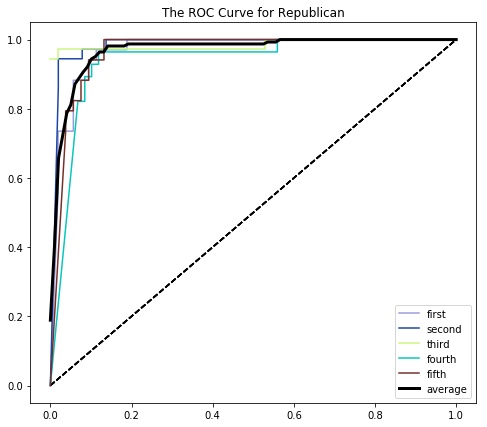

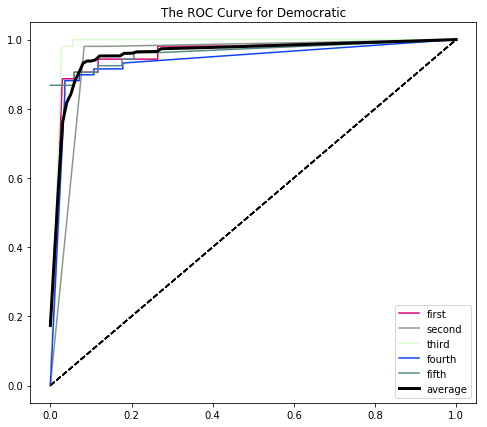

In [50]:
#use 5-fold-cross validation for Neural Network Multi Layer Perception classifier
from sklearn.neural_network import MLPClassifier
from scipy import interp
random_state = 5
rkf = RepeatedKFold(n_splits=5, n_repeats=1, random_state=random_state)
order=['first','second','third','fourth','fifth']
k=0
score=[]
Repub_recall=0
Demo_recall=0
Repub_precision=0
Demo_precision=0

tprs_1 = []
mean_fpr_1 = np.linspace(0, 1, 100)

tprs_0 = []
mean_fpr_0 = np.linspace(0, 1, 100)

for train, test in rkf.split(data):
    X_train, X_test = data[train], data[test]
    y_train, y_test = label[train], label[test]
    Mlp=MLPClassifier(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(500,200,100), random_state=1)
    print("The",order[k],"accuracy is",Mlp.fit(X_train,y_train).score(X_test,y_test))
    table_p=Mlp.fit(X_train,y_train).predict(X_test)
    print("The number of wrong predictions by using",order[k],"split is",(y_test!=table_p).sum())
    print("The sensitivity of Republican in",order[k],"split is",recall_score(y_test,table_p))
    print("The sensitivity of Democratic in",order[k],"split is",recall_score(y_test,table_p,pos_label=0))
    print("The precision of Republican in",order[k],"split is",precision_score(y_test,table_p))
    print("The precision of Democratic in",order[k],"split is",precision_score(y_test,table_p,pos_label=0))
    fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,Mlp.fit(X_train,y_train).predict_proba(X_test)[:,1],pos_label=1)
    fpr0, tpr0, thresholds0 = metrics.roc_curve(y_test,Mlp.fit(X_train,y_train).predict_proba(X_test)[:,0],pos_label=0)
    
    plt.figure(num=1,figsize=(8,7))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr1,tpr1,color=(random.random(),random.random(),random.random()),label=order[k])
    plt.title("The ROC Curve for Republican")
    
    plt.figure(num=0,figsize=(8,7))
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr0,tpr0,color=(random.random(),random.random(),random.random()),label=order[k])
    plt.title("The ROC Curve for Democratic")
    
    score.append(Mlp.fit(X_train,y_train).score(X_test,y_test))
    Repub_recall=recall_score(y_test,table_p)+Repub_recall
    Demo_recall=recall_score(y_test,table_p,pos_label=0)+Demo_recall
    Repub_precision=precision_score(y_test,table_p)+Repub_precision
    Demo_precision=precision_score(y_test,table_p,pos_label=0)+Demo_precision
    k+=1
    print("\n")
    
    tprs_1.append(interp(mean_fpr_1, fpr1, tpr1))
    tprs_0.append(interp(mean_fpr_0, fpr0, tpr0))
    
print("The MSE is",sum(score)/len(score))
print("The average sensitivity of Republican is",Repub_recall/5)
print("The average sensitivity of Democratic is",Demo_recall/5)
print("The average precision of Republican is",Repub_precision/5)
print("The average precision of Republican is",Demo_precision/5)

mean_tpr_1 = np.mean(tprs_1, axis=0)
mean_tpr_1[-1] = 1.0
plt.figure(num=1,figsize=(8,7))
plt.plot(mean_fpr_1, mean_tpr_1, color='black',label="average",linewidth=3.0)
plt.legend()

mean_tpr_0 = np.mean(tprs_0, axis=0)
mean_tpr_0[-1] = 1.0
plt.figure(num=0,figsize=(8,7))
plt.plot(mean_fpr_0, mean_tpr_0, color='black',label="average",linewidth=3.0)
plt.legend()